In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
plotly.__version__

'3.7.0'

In [2]:
#Importing the HDI data
data=pd.read_csv('Human Development Index (HDI).csv',encoding='cp1252')
data.head()

,Year,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,1990,NaN,0.645,0.577,NaN,NaN,NaN,0.704,0.631,0.866,...,0.775,0.860,0.692,NaN,NaN,0.634,0.475,0.399,0.401,0.491
1,1991,NaN,0.626,0.581,NaN,NaN,NaN,0.713,0.628,0.867,...,0.788,0.861,0.697,NaN,NaN,0.644,0.484,0.403,0.402,0.494
2,1992,NaN,0.610,0.587,NaN,NaN,NaN,0.720,0.580,0.868,...,0.801,0.867,0.700,NaN,NaN,0.651,0.496,0.405,0.403,0.481
3,1993,NaN,0.613,0.591,NaN,NaN,NaN,0.725,0.588,0.872,...,0.814,0.871,0.703,NaN,NaN,0.653,0.506,0.408,0.409,0.476
4,1994,NaN,0.619,0.595,NaN,NaN,NaN,0.728,0.599,0.875,...,0.827,0.875,0.709,NaN,NaN,0.654,0.517,0.409,0.408,0.473


In [3]:
# Column names
data.columns

Index(['Year', 'Afghanistan', ' Albania', 'Algeria', 'Andorra', 'Angola',
       ' Antigua and Barbuda', ' Argentina', ' Armenia', ' Australia',
       ...
       ' United Kingdom', 'United States', ' Uruguay', ' Uzbekistan',
       ' Vanuatu', ' Venezuela (Bolivarian Republic of)', ' Viet Nam',
       ' Yemen', ' Zambia', ' Zimbabwe'],
      dtype='object', length=190)

In [4]:
data.shape

(28, 190)

In [5]:
# Removing the leading space in each country names
col=[]
for i in data.columns:
    col.append(i.lstrip())
    
#print(col)   
data.columns=col

# Null Value check

In [6]:
data.India.isnull().sum()*100/len(data)

0.0

In [7]:
data["South Africa"].isnull().sum()*100/len(data)

0.0

In [8]:
data["United States"].isnull().sum()*100/len(data)

0.0

# India
### Train test split

In [9]:
df=data['India']

date_range=pd.date_range(start='1/1/1990',end='31/12/2017',freq='y')
date_range
df.index=date_range
df.head()


1990-12-31    0.427
1991-12-31    0.432
1992-12-31    0.438
1993-12-31    0.445
1994-12-31    0.452
Freq: A-DEC, Name: India, dtype: float64

In [10]:
df.tail()

2013-12-31    0.607
2014-12-31    0.618
2015-12-31    0.627
2016-12-31    0.636
2017-12-31    0.640
Freq: A-DEC, Name: India, dtype: float64

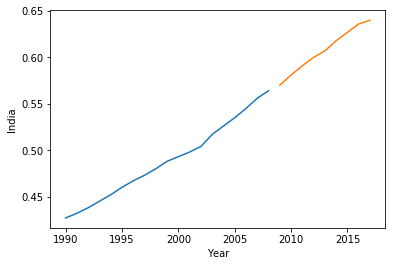

In [11]:
#Creating train and test set 
train=data[0:int(len(data)*0.7)] 
test=data[int(len(data)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.Year,train['India'],ci=None)
sns.lineplot(test.Year,test['India'],ci=None)
plt.show()

Text(0.5,1,'RSS: 7.5534')

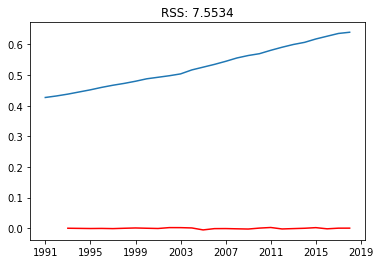

In [12]:
# ARIMA model
ts=data.India
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(0, 2, 1)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts[2:])**2))

In [13]:
results_ARIMA.fittedvalues


1992-12-31    0.000103
1993-12-31   -0.000346
1994-12-31   -0.000795
1995-12-31   -0.000494
1996-12-31   -0.001092
1997-12-31    0.000026
1998-12-31    0.000982
1999-12-31    0.000087
2000-12-31   -0.000709
2001-12-31    0.002164
2002-12-31    0.002070
2003-12-31    0.001083
2004-12-31   -0.005359
2005-12-31   -0.001159
2006-12-31   -0.000979
2007-12-31   -0.001753
2008-12-31   -0.002489
2009-12-31    0.000585
2010-12-31    0.002552
2011-12-31   -0.002223
2012-12-31   -0.001062
2013-12-31    0.000043
2014-12-31    0.002057
2015-12-31   -0.001760
2016-12-31    0.000333
2017-12-31    0.000423
Freq: A-DEC, dtype: float64

In [14]:
# ARIMA model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.India   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 122.142
Method:                       css-mle   S.D. of innovations              0.002
Date:                Mon, 01 Apr 2019   AIC                           -238.283
Time:                        22:37:04   BIC                           -234.509
Sample:                    12-31-1992   HQIC                          -237.197
                         - 12-31-2017                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0001   5.12e-05      2.005      0.056     2.3e-06       0.000
ma.L1.D2.India    -0.9998      0.163     -6.117      0.000      -1.320      -0.679
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
# Predicting the values for Training part

pred=results_ARIMA.predict()
print(len(pred))
data['Forecasted_India']=pred
data['Forecasted_India']

26


0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
Name: Forecasted_India, dtype: float64

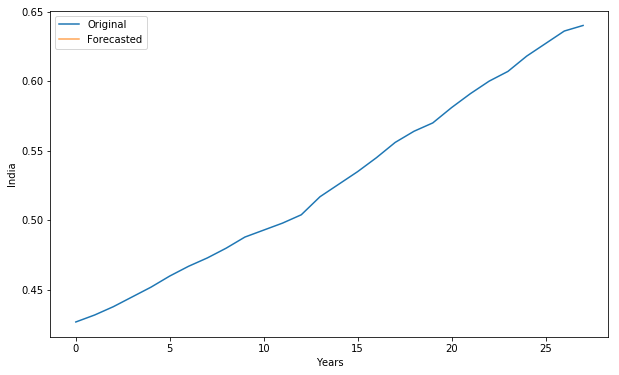

In [16]:
axis = data['India'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
data['Forecasted_India'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('India')
plt.legend(loc='best')
plt.show()
plt.close()

In [17]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [18]:
df_new=pd.DataFrame({'Forecast':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2018',end='31/12/2022',freq='y')
df_new.index=time
df_new

,Forecast,Standard Error,CI lower,CI Upper
2018-12-31,0.649524,0.002070,0.649395,0.649654
2019-12-31,0.659151,0.002928,0.658968,0.659335
2020-12-31,0.668881,0.003587,0.668656,0.669106
2021-12-31,0.678713,0.004142,0.678453,0.678973
2022-12-31,0.688648,0.004632,0.688357,0.688938


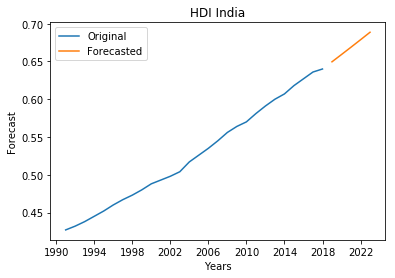

In [19]:
sns.lineplot(df.index,df.values,ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast'],ci=None,label='Forecasted')
plt.title('HDI India')
plt.xlabel('Years')
plt.legend()
plt.savefig('HDI India.jpg')
plt.show()


In [20]:
from sklearn.metrics import  accuracy_score

# MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mape=mean_absolute_percentage_error(data['India'][4:],data['Forecasted_India'][4:])
#MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((data['India'][4:] - data['Forecasted_India'][4:]) ** 2).mean()
rmse = np.sqrt(mse)
print('The RMSE value for ARIMA model is :',rmse)
#RMSE.append(rmse)

The MAPE value for ARIMA model is : nan
The RMSE value for ARIMA model is : nan


# South Africa
### Train test split

In [21]:
df=data.loc[:,['South Africa']]
date_range=pd.date_range(start='1/1/1990',end='31/12/2017',freq='y')
date_range
df.index=date_range
df.head(10)

,South Africa
1990-12-31,0.618
1991-12-31,0.626
1992-12-31,0.635
1993-12-31,0.641
1994-12-31,0.645
1995-12-31,0.649
1996-12-31,0.647
1997-12-31,0.644
1998-12-31,0.639
1999-12-31,0.634


In [22]:
df.tail(10)

,South Africa
2008-12-31,0.633
2009-12-31,0.642
2010-12-31,0.649
2011-12-31,0.657
2012-12-31,0.664
2013-12-31,0.675
2014-12-31,0.685
2015-12-31,0.692
2016-12-31,0.696
2017-12-31,0.699


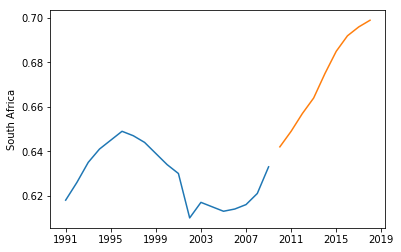

In [23]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['South Africa'],ci=None)
sns.lineplot(test.index,test['South Africa'],ci=None)
plt.show()

In [24]:
train['South Africa']

1990-12-31    0.618
1991-12-31    0.626
1992-12-31    0.635
1993-12-31    0.641
1994-12-31    0.645
1995-12-31    0.649
1996-12-31    0.647
1997-12-31    0.644
1998-12-31    0.639
1999-12-31    0.634
2000-12-31    0.630
2001-12-31    0.610
2002-12-31    0.617
2003-12-31    0.615
2004-12-31    0.613
2005-12-31    0.614
2006-12-31    0.616
2007-12-31    0.621
2008-12-31    0.633
Freq: A-DEC, Name: South Africa, dtype: float64

Text(0.5,1,'RSS: 10.8286')

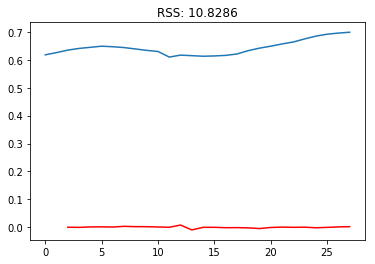

In [25]:
# ARIMA model
ts=data['South Africa']
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(0, 2, 1)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts[2:])**2))

In [26]:
results_ARIMA.fittedvalues

2    -0.000114
3    -0.000558
4     0.001045
5     0.001385
6     0.000574
7     0.003157
8     0.001956
9     0.001856
10    0.000810
11   -0.000208
12    0.007749
13   -0.009698
14   -0.000461
15   -0.000343
16   -0.001778
17   -0.001497
18   -0.002353
19   -0.004770
20   -0.000995
21    0.000387
22   -0.000419
23    0.000176
24   -0.002018
25   -0.000620
26    0.001071
27    0.001913
dtype: float64

In [27]:
# ARIMA model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D2.South Africa   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                  96.551
Method:                       css-mle   S.D. of innovations              0.006
Date:                Mon, 01 Apr 2019   AIC                           -187.101
Time:                        22:37:07   BIC                           -183.327
Sample:                             2   HQIC                          -186.015
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0001      0.001     -0.188      0.853      -0.001       0.001
ma.L1.D2.South Africa    -0.4979      0.143     -3.494      0.002      -0.777      -0.219
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.0085           +0.0000j            2.0085            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
# Predicting the values for Training part

pred=results_ARIMA.predict()
print(len(pred))
data['Forecasted_SouthAfrica']=pred
data['Forecasted_SouthAfrica']

24


0          NaN
1          NaN
2          NaN
3          NaN
4     0.001045
5     0.001385
6     0.000574
7     0.003157
8     0.001956
9     0.001856
10    0.000810
11   -0.000208
12    0.007749
13   -0.009698
14   -0.000461
15   -0.000343
16   -0.001778
17   -0.001497
18   -0.002353
19   -0.004770
20   -0.000995
21    0.000387
22   -0.000419
23    0.000176
24   -0.002018
25   -0.000620
26    0.001071
27    0.001913
Name: Forecasted_SouthAfrica, dtype: float64

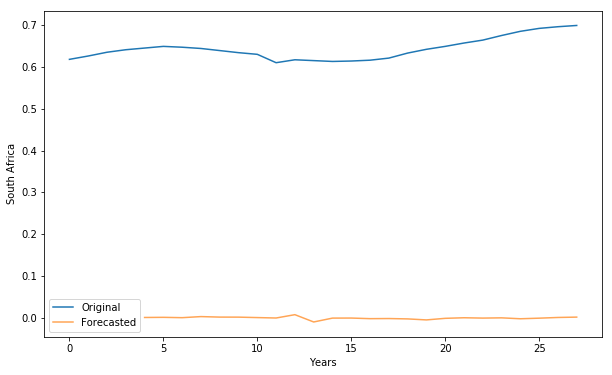

In [29]:
axis = data['South Africa'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
data['Forecasted_SouthAfrica'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('South Africa')
plt.legend(loc='best')
plt.show()
plt.close()

In [30]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [31]:
df_new=pd.DataFrame({'Forecast':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2018',end='31/12/2022',freq='y')
df_new.index=time
df_new

,Forecast,Standard Error,CI lower,CI Upper
2018-12-31,0.703337,0.005870,0.702969,0.703705
2019-12-31,0.707560,0.010593,0.706896,0.708225
2020-12-31,0.711670,0.015831,0.710678,0.712663
2021-12-31,0.715667,0.021611,0.714311,0.717022
2022-12-31,0.719549,0.027909,0.717799,0.721299


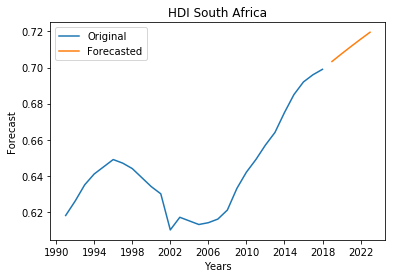

In [32]:
sns.lineplot(df.index,df['South Africa'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast'],ci=None,label='Forecasted')
plt.title('HDI South Africa')
plt.xlabel('Years')
plt.legend()
plt.savefig('HDI SA.jpg')
plt.show()


In [33]:
from sklearn.metrics import  accuracy_score

# MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mape=mean_absolute_percentage_error(data['South Africa'][4:],data['Forecasted_SouthAfrica'][4:])
#MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((data['South Africa'][4:] - data['Forecasted_SouthAfrica'][4:]) ** 2).mean()
rmse = np.sqrt(mse)
print('The RMSE value for ARIMA model is :',rmse)
#RMSE.append(rmse)

The MAPE value for ARIMA model is : 100.02236060786763
The RMSE value for ARIMA model is : 0.6459380328271843


# United States
### Train test split

In [34]:
df=data.loc[:,['United States']]
date_range=pd.date_range(start='1/1/1990',end='31/12/2017',freq='y')
date_range
df.index=date_range
df.head()

,United States
1990-12-31,0.860
1991-12-31,0.861
1992-12-31,0.867
1993-12-31,0.871
1994-12-31,0.875


In [35]:
df.tail()

,United States
2013-12-31,0.916
2014-12-31,0.918
2015-12-31,0.920
2016-12-31,0.922
2017-12-31,0.924


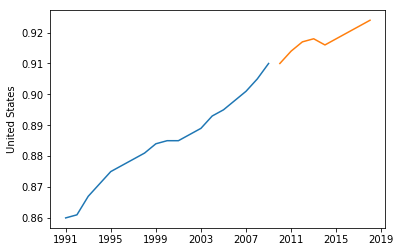

In [36]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

type(train)
train.head()

# SImple Plot of Test and train data
sns.lineplot(train.index,train['United States'],ci=None)
sns.lineplot(test.index,test['United States'],ci=None)
plt.show()

In [37]:
train['United States']

1990-12-31    0.860
1991-12-31    0.861
1992-12-31    0.867
1993-12-31    0.871
1994-12-31    0.875
1995-12-31    0.877
1996-12-31    0.879
1997-12-31    0.881
1998-12-31    0.884
1999-12-31    0.885
2000-12-31    0.885
2001-12-31    0.887
2002-12-31    0.889
2003-12-31    0.893
2004-12-31    0.895
2005-12-31    0.898
2006-12-31    0.901
2007-12-31    0.905
2008-12-31    0.910
Freq: A-DEC, Name: United States, dtype: float64

Text(0.5,1,'RSS: 20.9644')

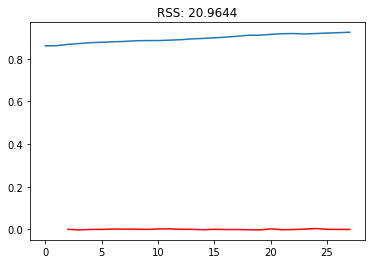

In [38]:
# ARIMA model
ts=data['United States']
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts, order=(0, 2, 1)) 
results_ARIMA = model.fit()  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts[2:])**2))

In [39]:
results_ARIMA.fittedvalues

2    -0.000053
3    -0.002579
4    -0.000438
5    -0.000381
6     0.001242
7     0.000983
8     0.000790
9    -0.000236
10    0.001515
11    0.002211
12    0.000140
13    0.000075
14   -0.001829
15    0.000106
16   -0.000887
17   -0.000884
18   -0.001825
19   -0.002721
20    0.002107
21   -0.001851
22   -0.000863
23    0.001033
24    0.003805
25   -0.000240
26   -0.000283
27   -0.000324
dtype: float64

In [40]:
# ARIMA model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D2.United States   No. Observations:                   26
Model:                 ARIMA(0, 2, 1)   Log Likelihood                 128.605
Method:                       css-mle   S.D. of innovations              0.002
Date:                Mon, 01 Apr 2019   AIC                           -251.210
Time:                        22:37:09   BIC                           -247.436
Sample:                             2   HQIC                          -250.123
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.251e-05   3.99e-05     -1.316      0.201      -0.000    2.57e-05
ma.L1.D2.United States    -0.9999      0.121     -8.290      0.000      -1.236      -0.763
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [41]:
# Predicting the values for Training part

pred=results_ARIMA.predict()
print(len(pred))
data['Forecasted_US']=pred
data['Forecasted_US']

24


0          NaN
1          NaN
2          NaN
3          NaN
4    -0.000438
5    -0.000381
6     0.001242
7     0.000983
8     0.000790
9    -0.000236
10    0.001515
11    0.002211
12    0.000140
13    0.000075
14   -0.001829
15    0.000106
16   -0.000887
17   -0.000884
18   -0.001825
19   -0.002721
20    0.002107
21   -0.001851
22   -0.000863
23    0.001033
24    0.003805
25   -0.000240
26   -0.000283
27   -0.000324
Name: Forecasted_US, dtype: float64

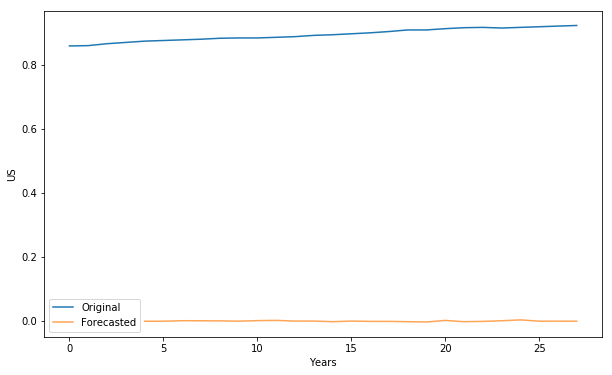

In [42]:
axis = data['United States'].plot(label='Original', figsize=(10, 6))
#df['Positive Indicators'].plot(ax=axis, label='Test', alpha=0.7)
data['Forecasted_US'].plot(ax=axis, label='Forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('US')
plt.legend(loc='best')
plt.show()
plt.close()

In [43]:
forecast=results_ARIMA.forecast(steps=5,alpha=0.95)
LI=[]
UI=[]
for i in forecast[2]:
    LI.append(i[0])
    UI.append(i[1])

C:\Users\HII\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [44]:
df_new=pd.DataFrame({'Forecast':forecast[0],'Standard Error':forecast[1],'CI lower':LI,'CI Upper':UI})

time=pd.date_range(start='1/1/2018',end='31/12/2022',freq='y')
df_new.index=time
df_new

,Forecast,Standard Error,CI lower,CI Upper
2018-12-31,0.925623,0.001615,0.925522,0.925725
2019-12-31,0.927194,0.002284,0.927051,0.927337
2020-12-31,0.928712,0.002797,0.928537,0.928888
2021-12-31,0.930178,0.003230,0.929976,0.930381
2022-12-31,0.931592,0.003612,0.931365,0.931818


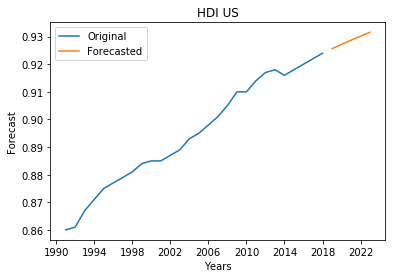

In [45]:
sns.lineplot(df.index,df['United States'],ci=None,label='Original')
sns.lineplot(df_new.index,df_new['Forecast'],ci=None,label='Forecasted')
plt.title('HDI US')
plt.xlabel('Years')
plt.legend()
plt.savefig('HDI US.jpg')
plt.show()


In [46]:
from sklearn.metrics import  accuracy_score

# MAPE calculation function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mape=mean_absolute_percentage_error(data['United States'][4:],data['Forecasted_US'][4:])
#MAPE.append(mape)
print('The MAPE value for ARIMA model is :',mape)
mse = ((data['United States'][4:] - data['Forecasted_US'][4:]) ** 2).mean()
rmse = np.sqrt(mse)
print('The RMSE value for ARIMA model is :',rmse)
#RMSE.append(rmse)

The MAPE value for ARIMA model is : 99.9938179109519
The RMSE value for ARIMA model is : 0.9002193887168334
